In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit
from glob import glob

In [2]:
def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

In [3]:
def graph_more():
    plt.axvline(6563, label=r'H$\alpha$', color='red')
    plt.axvline(4861, label=r'H$\beta$', color='cyan')
    plt.xlabel('Rest $\lambda$ ($\AA$)'); plt.legend(loc=1); plt.show()

In [4]:
file = ['../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201208_Gr11_Free_slit1.0_59229_1_err.asci',
        '../Files/at2019qiz_charlotte/20210208_MUSE.txt',
        '../Files/at2018hyz_tns/spec.ascii']

___
## AT2020zso

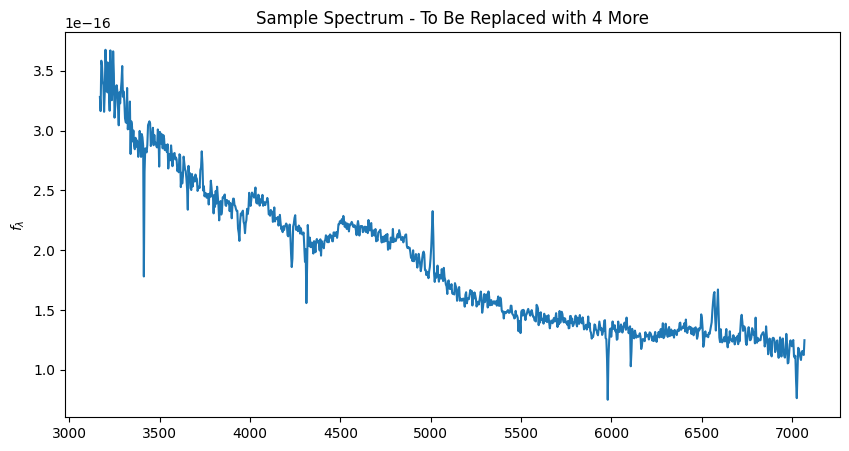

In [13]:
z = 0.0563

table = Table.read(
    '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201208_Gr11_Free_slit1.0_59229_1_err.asci', format='ascii'
).to_pandas()
wl, flux, error = table['col1'], table['col2'], table['col3']

continuum = curve_fit(power_law, wl, flux, p0=[1e-5, -2, 1e-16], maxfev=10000)
pl_params = continuum[0]

plt.figure(figsize=(10, 5))
plt.plot(wl/(1+z), flux, label='data')
plt.ylabel('$f_{\lambda}$')
plt.title('Sample Spectrum - To Be Replaced with 4 More')
plt.savefig('p.png')
plt.show() #graph_more()

In [6]:
pl_params

array([ 7.20653131e-11, -1.53534141e+00,  2.64705731e-17])

In [9]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 3350)); wl_2 = np.argmin(np.abs(wl/(1+z) - 3950))
wl_3 = np.argmin(np.abs(wl/(1+z) - 5400)); wl_4 = np.argmin(np.abs(wl/(1+z) - 6100))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, wl.index[-1])))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range); error_cut = np.delete(error, cut_range)

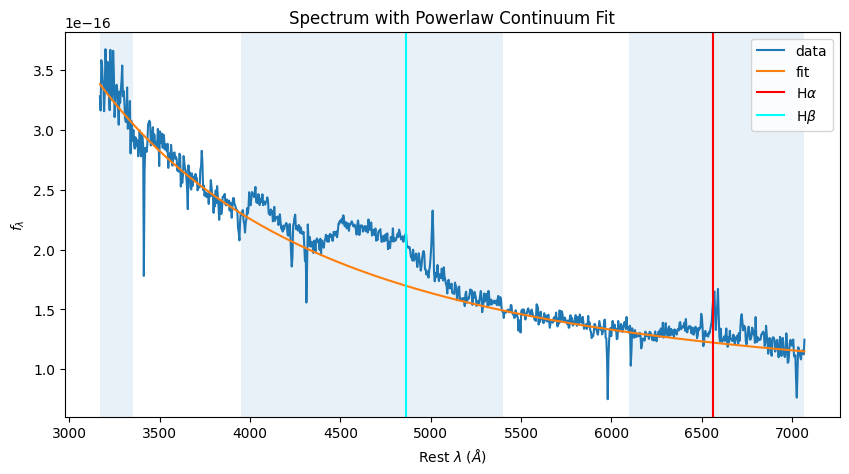

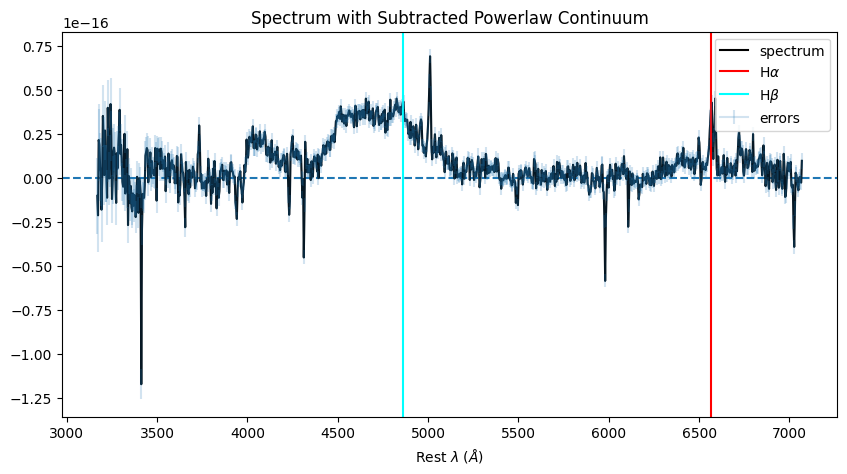

In [10]:
continuum1 = curve_fit(power_law, wl_cut, flux_cut, sigma=error_cut, absolute_sigma=True, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(10, 5))
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[wl.index[-1]]/(1+z), alpha=0.1)
plt.plot(wl/(1+z), flux, label='data'); plt.plot(wl/(1+z), power_law(wl, *continuum1[0]), label='fit')
plt.ylabel('$f_{\lambda}$'); plt.title('Spectrum with Powerlaw Continuum Fit')
graph_more()

plt.figure(figsize=(10, 5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum1[0]), color='black', label='spectrum')
plt.errorbar(wl/(1+z), flux - power_law(wl, *continuum1[0]), yerr=error[:1011], alpha=0.2, label='errors')
plt.title('Spectrum with Subtracted Powerlaw Continuum')
#plt.xlim(6300, 6900); plt.ylim(-1e-17, 4.2e-17)
graph_more()

In [11]:
continuum1[0]

array([ 8.74764134e-08, -2.43552278e+00,  7.81167947e-17])

___
## ASASSN-18pg

In [12]:
files = glob('../Files/A*/a*')

In [13]:
files[0]

'../Files/ASASSN-18pg_decam_charlotte/a01.txt'

In [14]:
test = pandas.read_csv(files[0], sep='\s+', header=None)
test.iloc[0, 1]

180717

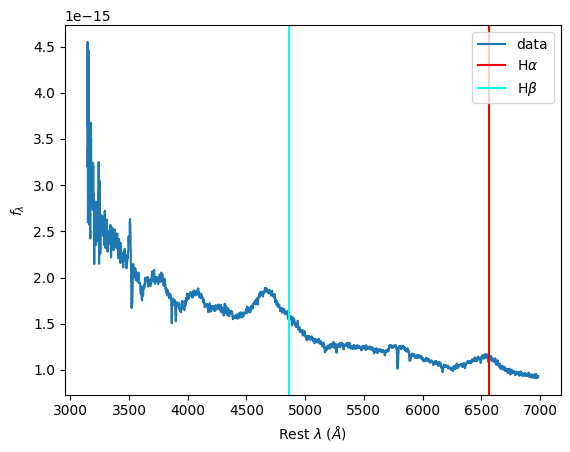

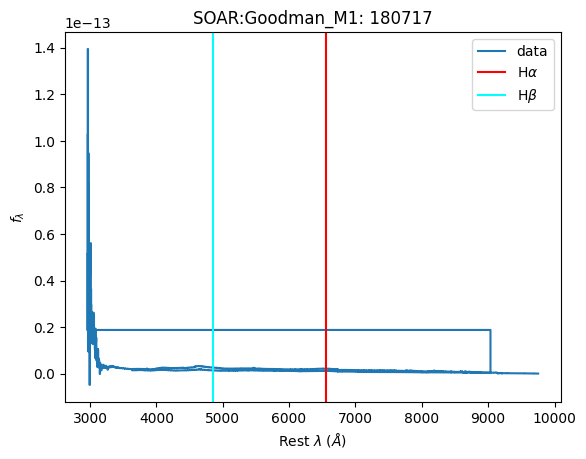

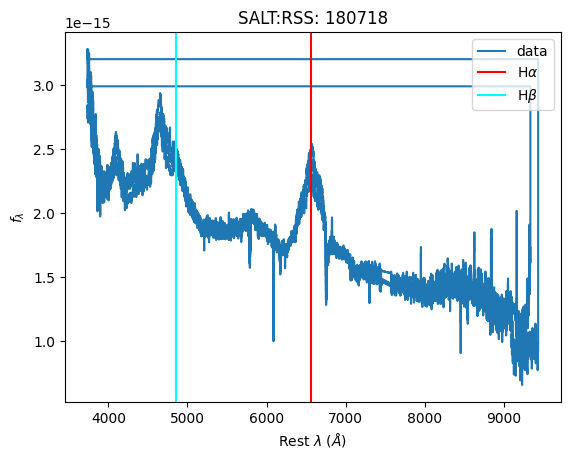

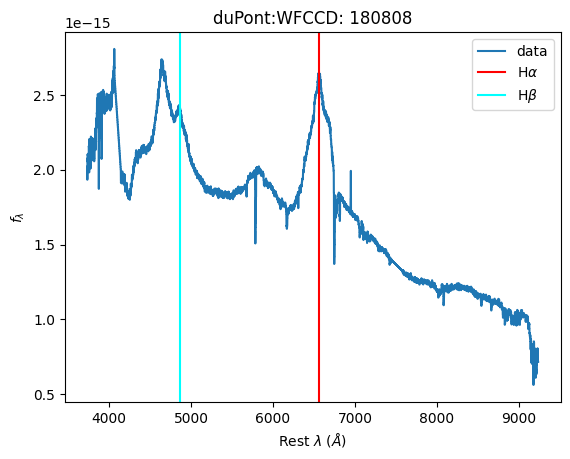

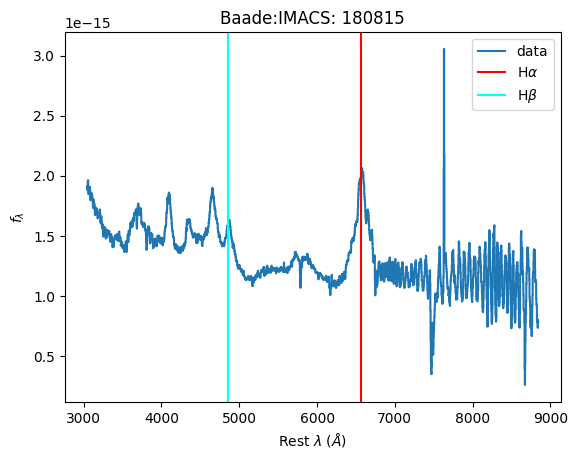

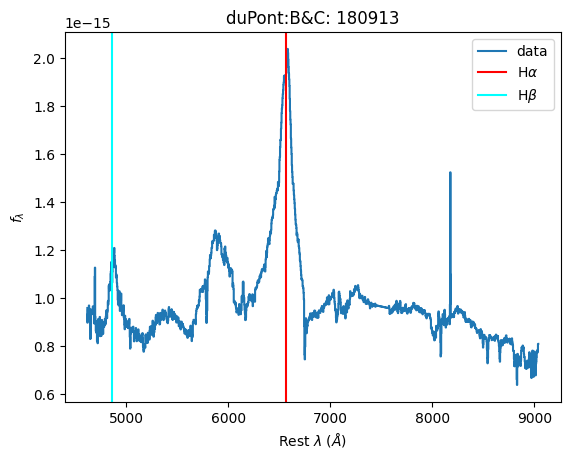

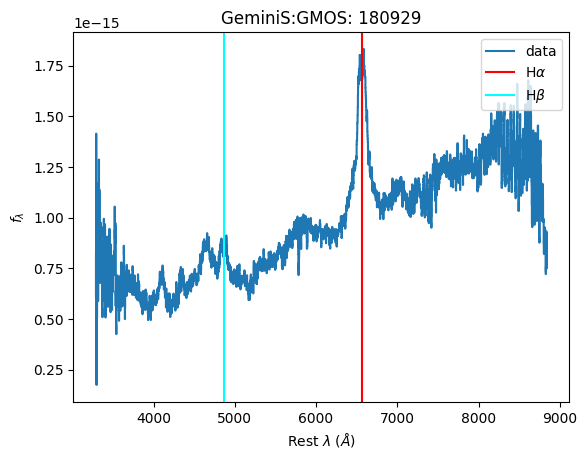

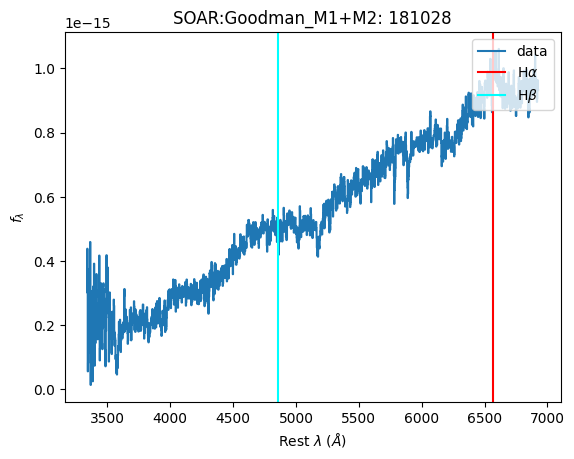

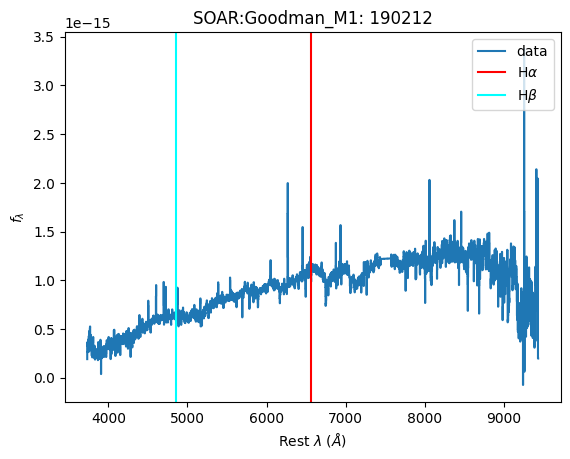

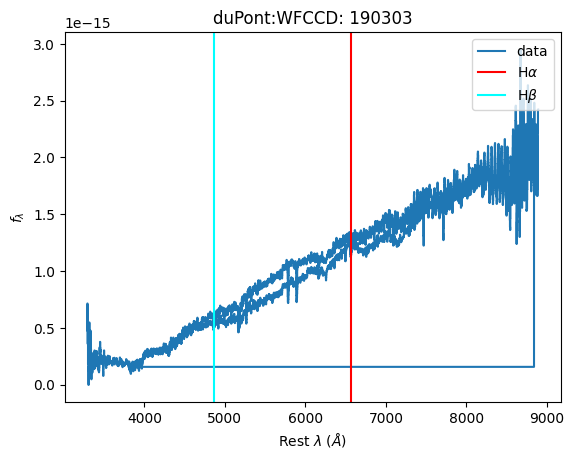

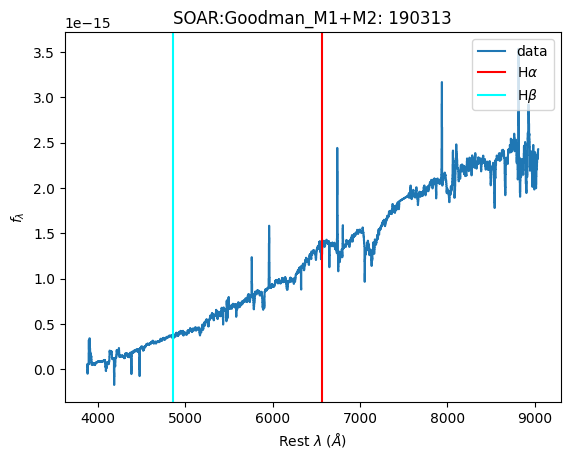

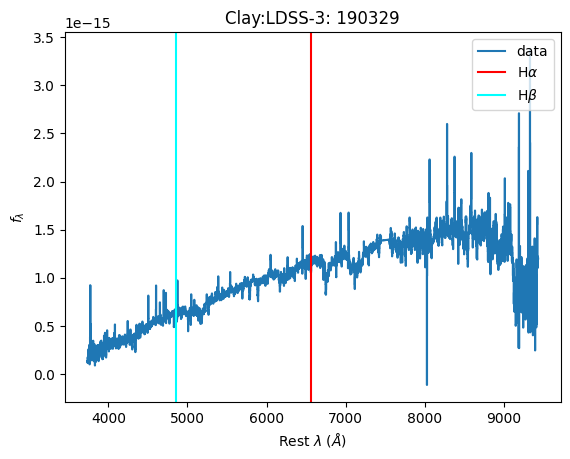

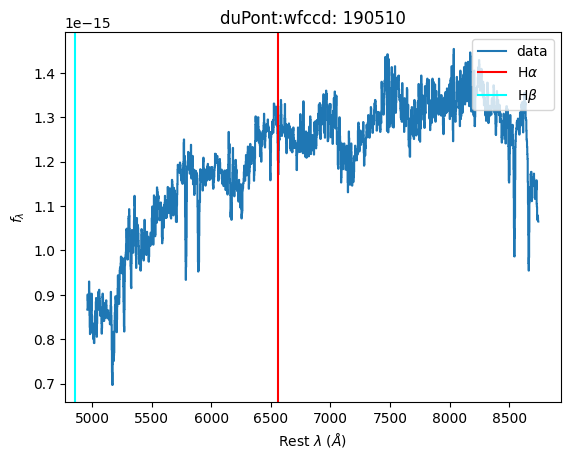

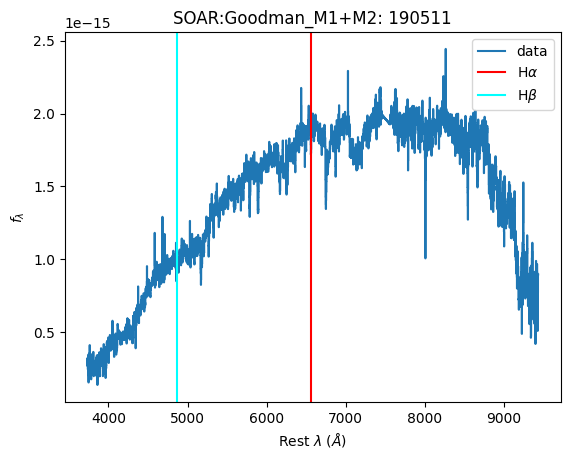

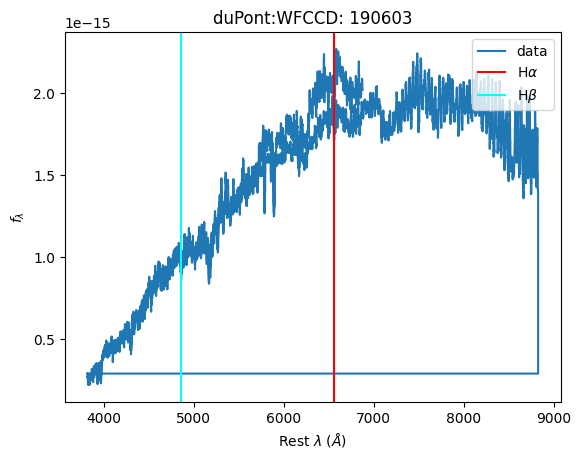

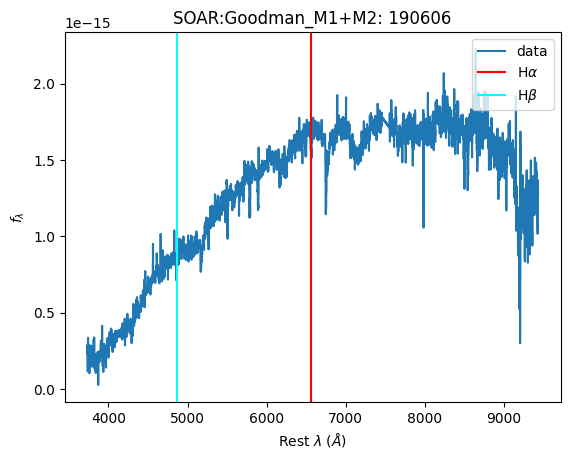

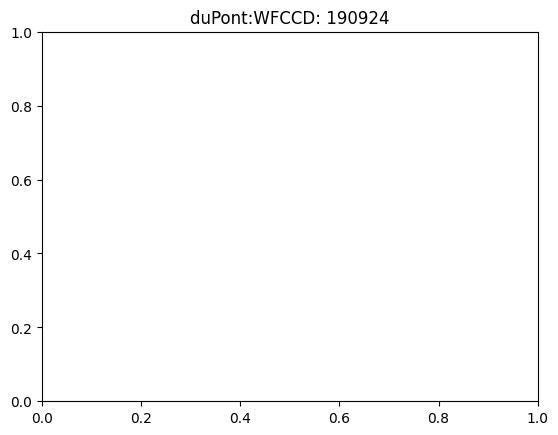

In [15]:
# most or all plots are already redshifted
z = 0

for file in files:
    data = pandas.read_csv(file, sep='\s+', header=None)
    data.columns = ['Instrument', 'Date', 'wl', 'flux']

    wl, flux = data['wl'], data['flux']
    
    plt.step(wl/(1+z), flux, label='data')
    plt.ylabel('$f_{\lambda}$')
    graph_more()
    plt.title(f'{data.iloc[0, 0]}: {data.iloc[0, 1]}')

In [16]:
files[6]

'../Files/ASASSN-18pg_decam_charlotte/a07.txt'

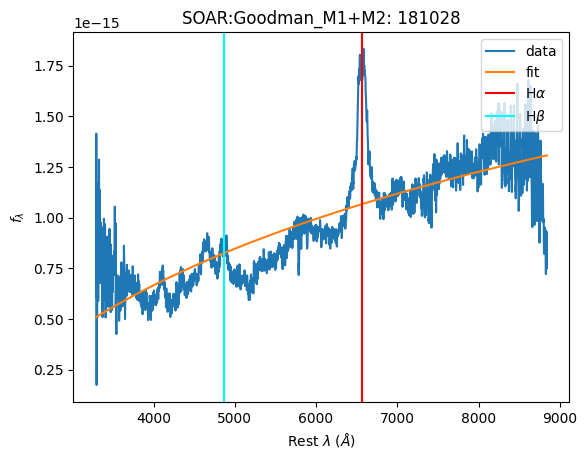

In [17]:
spec = files[6]
data = pandas.read_csv(spec, sep='\s+', header=None)
data.columns = ['Instrument', 'Date', 'wl', 'flux']

wl, flux = data['wl'], data['flux']

continuum = curve_fit(power_law, wl, flux, p0=[1e-5, -2, 1e-16], maxfev=10000)
pl_params = continuum[0]

plt.plot(wl/(1+z), flux, label='data')
plt.plot(wl/(1+z), power_law(wl, *continuum[0]), label='fit')
plt.ylabel('$f_{\lambda}$')
plt.title(f'{data.iloc[0, 0]}: {data.iloc[0, 1]}')
graph_more()

In [22]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 3950)); wl_2 = np.argmin(np.abs(wl/(1+z) - 4500))
wl_3 = np.argmin(np.abs(wl/(1+z) - 5000)); wl_4 = np.argmin(np.abs(wl/(1+z) - 6250))
wl_5 = np.argmin(np.abs(wl/(1+z) - 6800)); wl_6 = np.argmin(np.abs(wl/(1+z) - 8000))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, wl_5), np.arange(wl_6, wl.index[-1])))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range)

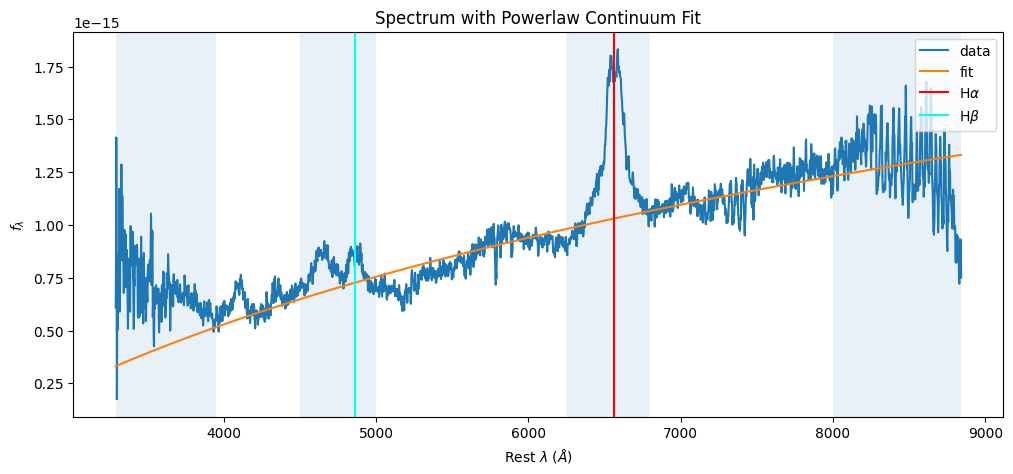

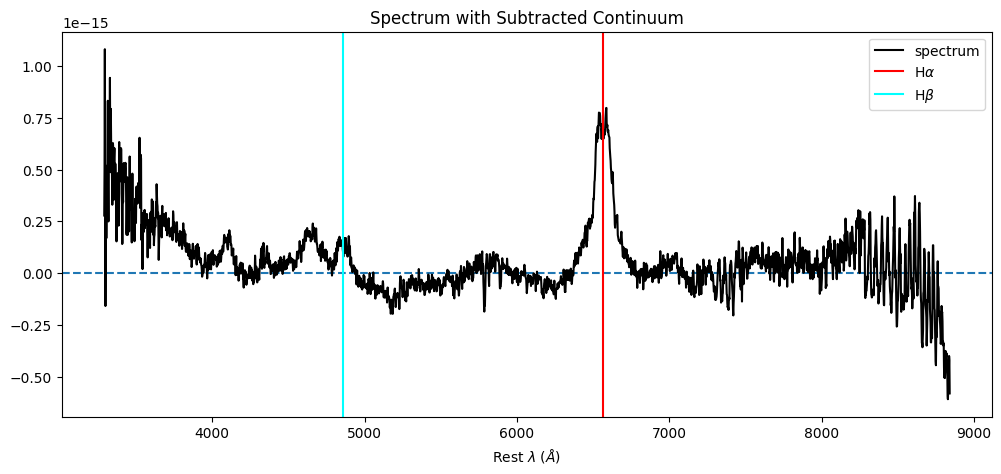

In [23]:
continuum1 = curve_fit(power_law, wl_cut, flux_cut, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, label='data'); plt.plot(wl/(1+z), power_law(wl, *continuum1[0]), label='fit')
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1); plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[wl_5]/(1+z), alpha=0.1); plt.axvspan(wl[wl_6]/(1+z), wl[wl.index[-1]]/(1+z), alpha=0.1)
plt.ylabel('$f_{\lambda}$'); plt.title('Spectrum with Powerlaw Continuum Fit')
graph_more()

plt.figure(figsize=(12, 5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum1[0]), color='black', label='spectrum')
plt.title('Spectrum with Subtracted Continuum')
graph_more()

In [24]:
continuum1[0]

array([-5.69314816e-12, -1.78149645e-04,  5.68527108e-12])

___
## AT2019qiz

In [27]:
table

,col1,col2,col3
0,4697.123047,7.712891e-16,1.395325e-17
1,4698.373047,7.916022e-16,9.458962e-18
2,4699.623047,8.110321e-16,9.648461e-18
3,4700.873047,7.887980e-16,9.472313e-18
4,4702.123047,8.006792e-16,9.599666e-18
...,...,...,...
3716,9342.123047,6.819216e-16,1.090497e-17
3717,9343.373047,7.730777e-16,9.662259e-18
3718,9344.623047,8.055701e-16,9.486032e-18
3719,9345.873047,7.882493e-16,1.057933e-17


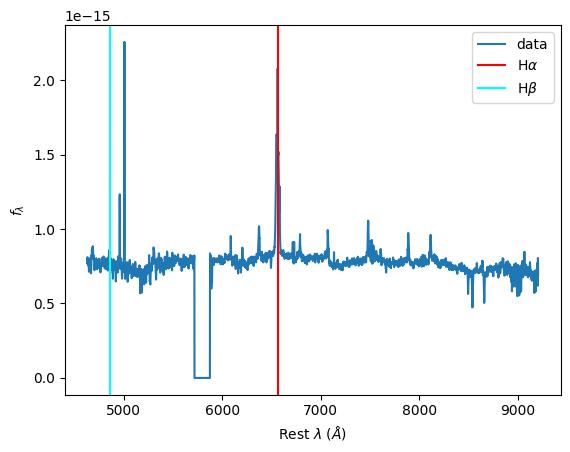

In [28]:
z = 0.01513

table = Table.read('../Files/at2019qiz_charlotte/20210208_MUSE.txt', format='ascii').to_pandas()
wl, flux, error = table['col1'], table['col2'], table['col3']

continuum = curve_fit(power_law, wl, flux, p0=[1e-5, -2, 1e-16], maxfev=10000)
pl_params = continuum[0]

plt.plot(wl/(1+z), flux, label='data')
plt.ylabel('$f_{\lambda}$')
#plt.xlim(6500, 6700)
graph_more()

In [39]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 5150)); wl_2 = np.argmin(np.abs(wl/(1+z) - 5700))
wl_3 = np.argmin(np.abs(wl/(1+z) - 5900)); wl_4 = np.argmin(np.abs(wl/(1+z) - 6300))
wl_5 = np.argmin(np.abs(wl/(1+z) - 6800)); wl_6 = np.argmin(np.abs(wl/(1+z) - 8800))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, wl_5), np.arange(wl_6, wl.index[-1])))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range); error_cut = np.delete(error, cut_range)

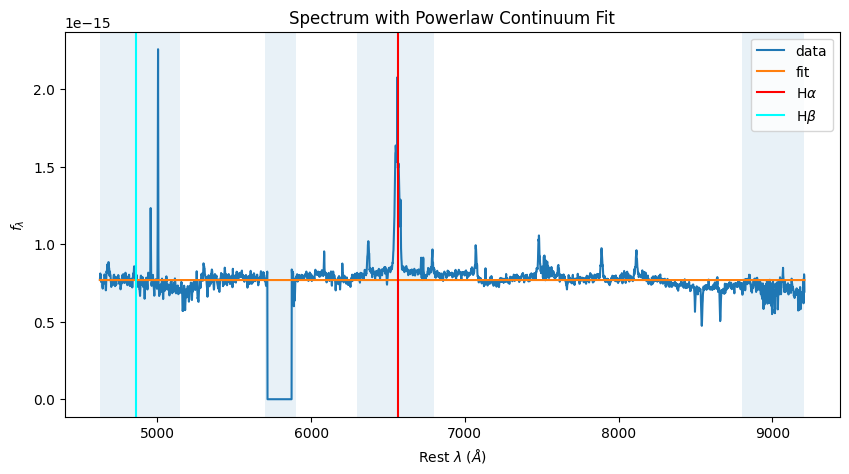

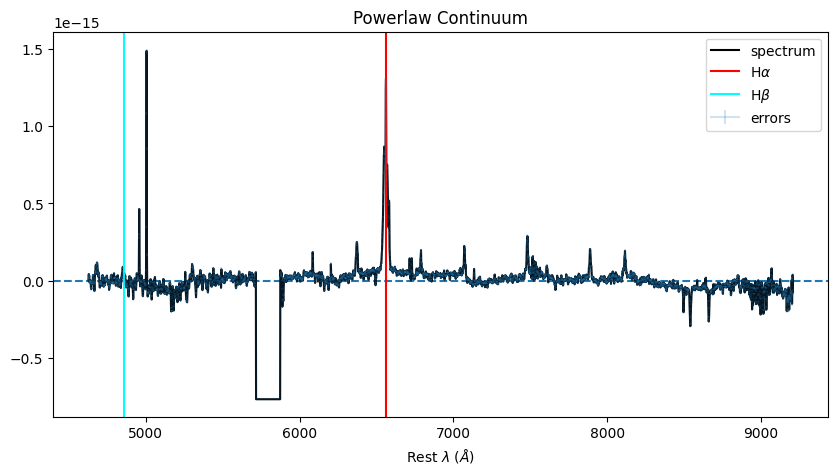

In [40]:
continuum1 = curve_fit(power_law, wl_cut, flux_cut, sigma=error_cut, absolute_sigma=True, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(10, 5))
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1); plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[wl_5]/(1+z), alpha=0.1); plt.axvspan(wl[wl_6]/(1+z), wl[wl.index[-1]]/(1+z), alpha=0.1)
plt.plot(wl/(1+z), flux, label='data'); plt.plot(wl/(1+z), power_law(wl, *continuum1[0]), label='fit')
plt.ylabel('$f_{\lambda}$'); plt.title('Spectrum with Powerlaw Continuum Fit')
graph_more()

plt.figure(figsize=(10, 5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum1[0]), color='black', label='spectrum')
plt.errorbar(wl/(1+z), flux - power_law(wl, *continuum1[0]), yerr=error, alpha=0.2, label='errors')
plt.title('Powerlaw Continuum')
#plt.xlim(6500, 6600)
graph_more()

In [41]:
continuum1[0]

array([-2.57426216e-06, -4.41129826e+00,  7.68577702e-16])

___
# AT2018hyz

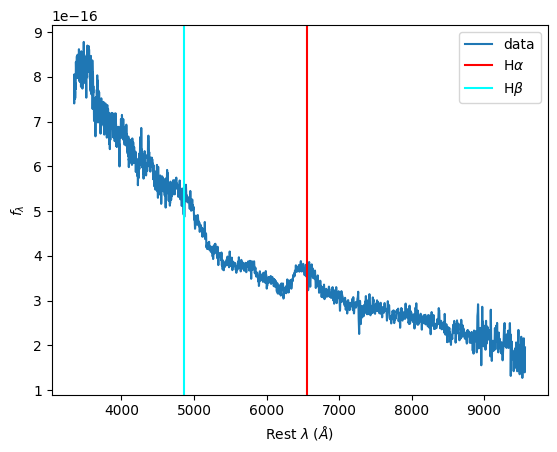

In [121]:
z = 0.04573

table = Table.read('../Files/at2018hyz_tns/spec.ascii', format='ascii').to_pandas()
wl, flux = table['col1'], table['col2']

continuum = curve_fit(power_law, wl, flux, p0=[1e-5, -2, 1e-16], maxfev=10000)
pl_params = continuum[0]

plt.plot(wl/(1+z), flux, label='data')
plt.ylabel('$f_{\lambda}$')
graph_more()

In [122]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 5300)); wl_2 = np.argmin(np.abs(wl/(1+z) - 6200))
wl_3 = np.argmin(np.abs(wl/(1+z) - 7100)); wl_4 = np.argmin(np.abs(wl/(1+z) - 8800))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, wl.index[-1])))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range)

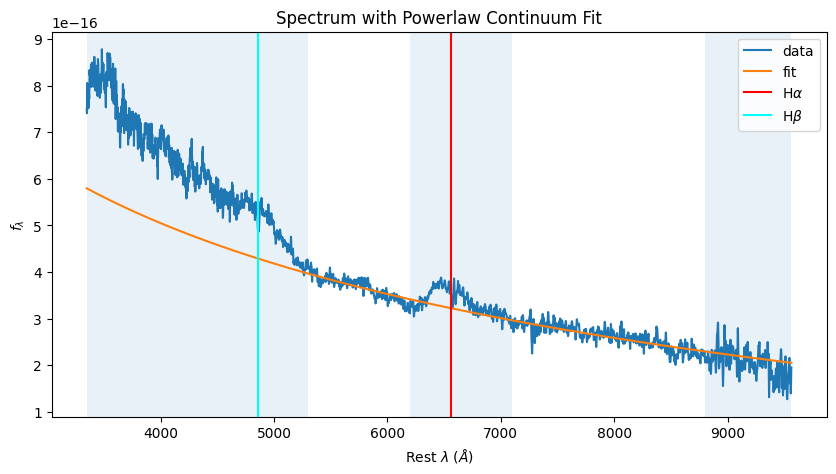

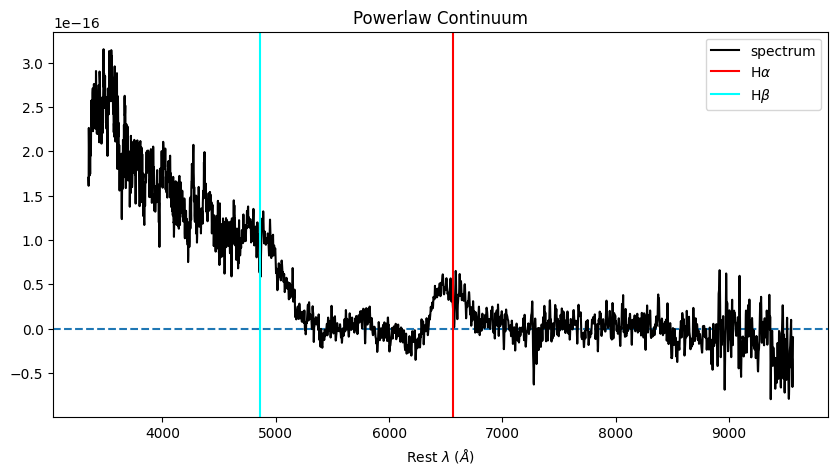

In [123]:
continuum1 = curve_fit(power_law, wl_cut, flux_cut, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(10, 5))
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[wl.index[-1]]/(1+z), alpha=0.1)
plt.plot(wl/(1+z), flux, label='data'); plt.plot(wl/(1+z), power_law(wl, *continuum1[0]), label='fit')
plt.ylabel('$f_{\lambda}$'); plt.title('Spectrum with Powerlaw Continuum Fit')
graph_more()

plt.figure(figsize=(10, 5))
plt.axhline(0, linestyle='--')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum1[0]), color='black', label='spectrum')
plt.title('Powerlaw Continuum')
graph_more()

In [124]:
continuum1[0]

array([ 2.63655176e-14, -3.89921358e-01, -5.33932829e-16])